# CELL 1: Imports and Setup
Import all necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

print("✓ Libraries imported successfully!")
print("Ready to visualize tiling results")

✓ Libraries imported successfully!
Ready to visualize tiling results


# CELL 2: Load Data
This loads my tiling_results.csv file

In [2]:

def load_data(filename='tiling_results.csv'):
    """Load tiling benchmark results"""
    try:
        df = pd.read_csv(filename)
        print(f"✓ Loaded results for {len(df)} configurations")
        print(f"\nData preview:")
        print(df)
        return df
    except FileNotFoundError:
        print(f"✗ Error: Could not find {filename}")
        print("Make sure you've run the tiling benchmark first!")
        return None

# Load the data
df = load_data('tiling_results.csv')

✓ Loaded results for 6 configurations

Data preview:
   BlockSize  MeanTime_ms  Speedup
0          0      91.1583  1.00000
1          2      73.8293  1.23472
2          4      71.4032  1.27667
3          8      70.6461  1.29035
4         16      70.7005  1.28936
5         32      68.7137  1.32664


# CELL 3: Print Statistical Analysis
This shows detailed statistics and identifies the best block size

In [3]:
def print_analysis(df):
    """Print detailed analysis"""
    print("\n" + "="*60)
    print("TILING ANALYSIS")
    print("="*60)
    
    baseline_time = df[df['BlockSize'] == 0]['MeanTime_ms'].values[0]
    tiled = df[df['BlockSize'] != 0]
    
    print(f"\nBaseline (non-tiled): {baseline_time:.3f} ms")
    print("\nTiled Results:")
    print("-" * 60)
    
    for idx, row in tiled.iterrows():
        improvement = (1 - row['Speedup']) * -100
        print(f"Block {int(row['BlockSize']):2d}: {row['MeanTime_ms']:6.3f} ms | "
              f"Speedup: {row['Speedup']:.3f}x | Improvement: {improvement:+.1f}%")
    
    # Find best
    best_idx = tiled['Speedup'].idxmax()
    best_block = int(tiled.loc[best_idx, 'BlockSize'])
    best_speedup = tiled.loc[best_idx, 'Speedup']
    best_improvement = (1 - best_speedup) * -100
    
    print("="*60)
    print(f"BEST BLOCK SIZE: {best_block}")
    print(f"Speedup: {best_speedup:.3f}x ({best_improvement:+.1f}% improvement)")
    print("="*60)
    
    # Analysis
    print("\nWHY THIS BLOCK SIZE IS OPTIMAL:")
    if best_block <= 4:
        print("- Small blocks reduce cache footprint")
        print("- Good for systems with small L1 cache")
    elif best_block <= 16:
        print("- Balanced tile size fits well in L1 cache")
        print("- Good reuse within tiles")
        print("- Not too much tiling overhead")
    else:
        print("- Larger blocks reduce tiling overhead")
        print("- May work well with larger L2 cache")
    
    print("\n" + "="*60 + "\n")

# Run the analysis
if df is not None:
    print_analysis(df)


TILING ANALYSIS

Baseline (non-tiled): 91.158 ms

Tiled Results:
------------------------------------------------------------
Block  2: 73.829 ms | Speedup: 1.235x | Improvement: +23.5%
Block  4: 71.403 ms | Speedup: 1.277x | Improvement: +27.7%
Block  8: 70.646 ms | Speedup: 1.290x | Improvement: +29.0%
Block 16: 70.701 ms | Speedup: 1.289x | Improvement: +28.9%
Block 32: 68.714 ms | Speedup: 1.327x | Improvement: +32.7%
BEST BLOCK SIZE: 32
Speedup: 1.327x (+32.7% improvement)

WHY THIS BLOCK SIZE IS OPTIMAL:
- Larger blocks reduce tiling overhead
- May work well with larger L2 cache




# CELL 4: Plot 1 - Performance vs Block Size (Line Graph)
Shows execution time for each block size with baseline reference

✓ Saved: plot_tiling_performance.png


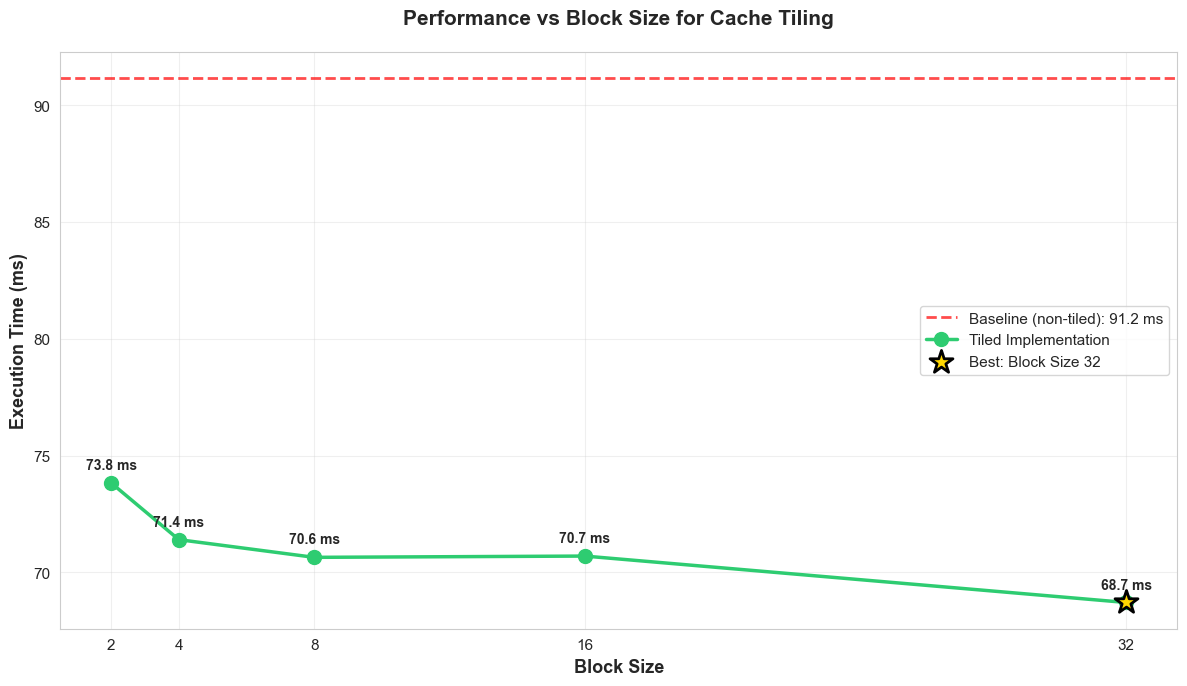

In [4]:
def plot_performance_vs_blocksize(df):
    """Plot execution time vs block size"""
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # Separate baseline from tiled versions
    baseline = df[df['BlockSize'] == 0]
    tiled = df[df['BlockSize'] != 0]
    
    # Plot baseline as horizontal line
    ax.axhline(y=baseline['MeanTime_ms'].values[0], 
               color='red', linestyle='--', linewidth=2, 
               label=f'Baseline (non-tiled): {baseline["MeanTime_ms"].values[0]:.1f} ms',
               alpha=0.7)
    
    # Plot tiled versions
    ax.plot(tiled['BlockSize'], tiled['MeanTime_ms'], 
            marker='o', markersize=10, linewidth=2.5, 
            color='#2ecc71', label='Tiled Implementation')
    
    # Add value labels on points
    for idx, row in tiled.iterrows():
        ax.annotate(f'{row["MeanTime_ms"]:.1f} ms', 
                   xy=(row['BlockSize'], row['MeanTime_ms']),
                   xytext=(0, 10), textcoords='offset points',
                   ha='center', fontsize=10, fontweight='bold')
    
    # Find and mark best performance
    best_idx = tiled['MeanTime_ms'].idxmin()
    best_block = tiled.loc[best_idx, 'BlockSize']
    best_time = tiled.loc[best_idx, 'MeanTime_ms']
    ax.scatter([best_block], [best_time], 
              s=300, color='gold', marker='*', 
              edgecolor='black', linewidth=2,
              label=f'Best: Block Size {int(best_block)}', zorder=5)
    
    ax.set_xlabel('Block Size', fontsize=13, fontweight='bold')
    ax.set_ylabel('Execution Time (ms)', fontsize=13, fontweight='bold')
    ax.set_title('Performance vs Block Size for Cache Tiling', 
                 fontsize=15, fontweight='bold', pad=20)
    ax.set_xticks(tiled['BlockSize'])
    ax.legend(fontsize=11, loc='best')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('plot_tiling_performance.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: plot_tiling_performance.png")
    plt.show()

# Generate the plot
if df is not None:
    plot_performance_vs_blocksize(df)


# CELL 5: Plot 2 - Speedup vs Block Size (Bar Chart)
Shows speedup factor for each block size

✓ Saved: plot_tiling_speedup.png


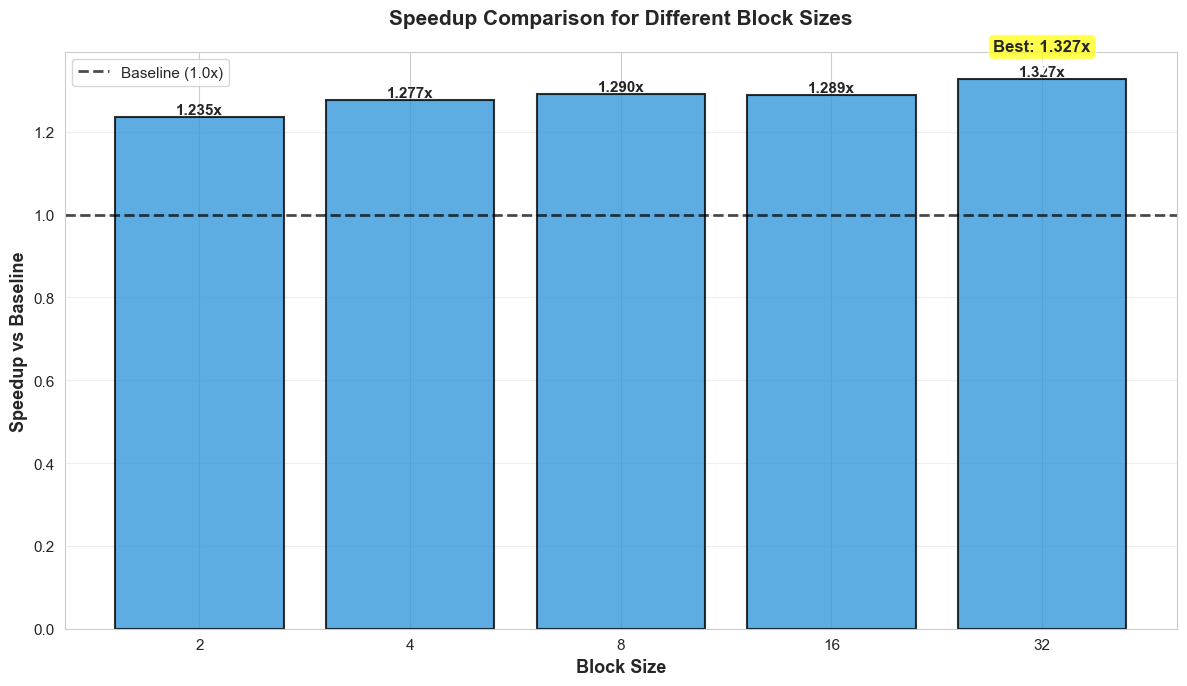

In [5]:
def plot_speedup_vs_blocksize(df):
    """Plot speedup vs block size"""
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # Separate baseline from tiled versions
    tiled = df[df['BlockSize'] != 0].copy()
    
    # Create bar chart with colors based on speedup
    colors = ['#3498db' if s >= 1.0 else '#e74c3c' for s in tiled['Speedup']]
    bars = ax.bar(tiled['BlockSize'].astype(str), tiled['Speedup'], 
                   color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
    
    # Add baseline line at 1.0x
    ax.axhline(y=1.0, color='black', linestyle='--', linewidth=2, 
               label='Baseline (1.0x)', alpha=0.7)
    
    # Add value labels on bars
    for bar, speedup in zip(bars, tiled['Speedup']):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{speedup:.3f}x',
                ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    # Find and mark best speedup
    best_idx = tiled['Speedup'].idxmax()
    best_block = tiled.loc[best_idx, 'BlockSize']
    best_speedup = tiled.loc[best_idx, 'Speedup']
    
    # Add annotation for best
    ax.annotate(f'Best: {best_speedup:.3f}x', 
               xy=(str(int(best_block)), best_speedup),
               xytext=(0, 20), textcoords='offset points',
               ha='center', fontsize=12, fontweight='bold',
               bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7),
               arrowprops=dict(arrowstyle='->', lw=2))
    
    ax.set_xlabel('Block Size', fontsize=13, fontweight='bold')
    ax.set_ylabel('Speedup vs Baseline', fontsize=13, fontweight='bold')
    ax.set_title('Speedup Comparison for Different Block Sizes', 
                 fontsize=15, fontweight='bold', pad=20)
    ax.legend(fontsize=11)
    ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('plot_tiling_speedup.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: plot_tiling_speedup.png")
    plt.show()

# Generate the plot
if df is not None:
    plot_speedup_vs_blocksize(df)


# CELL 6: Plot 3 - Combined Analysis (Side-by-Side)
Shows both execution time and speedup in one figure

✓ Saved: plot_tiling_combined.png


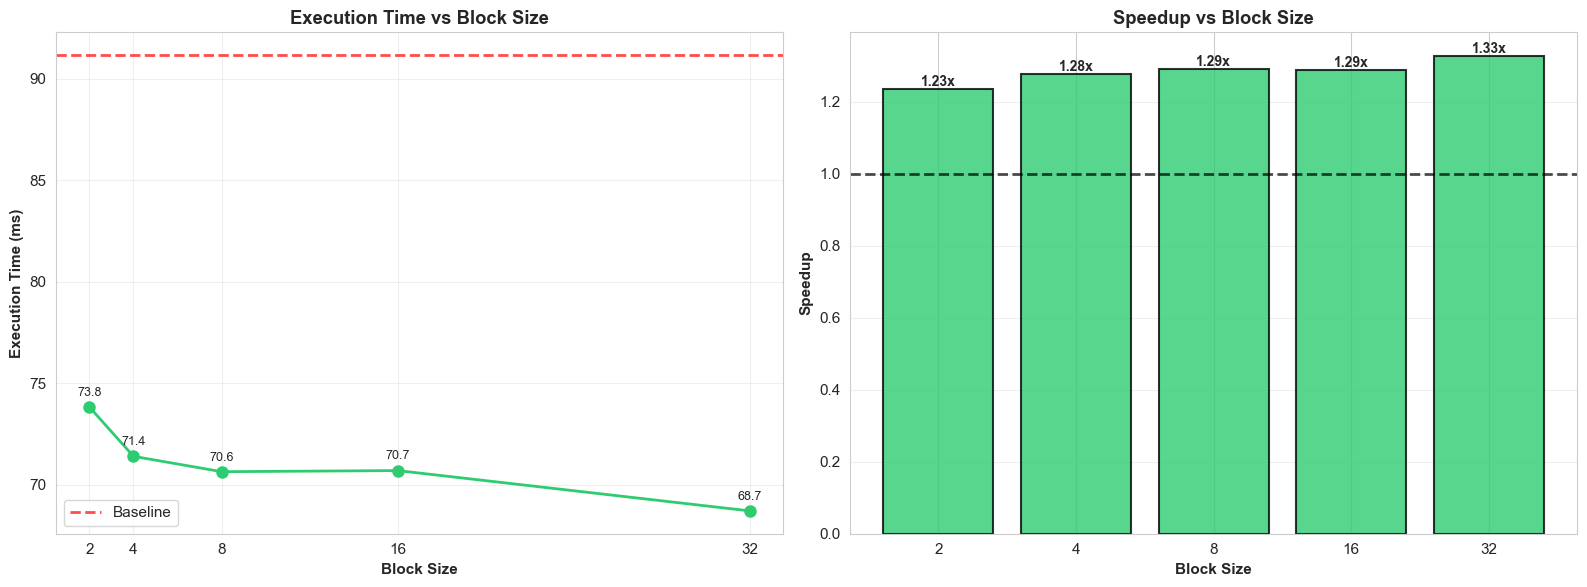

In [6]:
def plot_combined_analysis(df):
    """Create combined plot with both metrics"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Separate data
    baseline = df[df['BlockSize'] == 0]
    tiled = df[df['BlockSize'] != 0]
    
    # LEFT PLOT: Execution Time
    ax1.axhline(y=baseline['MeanTime_ms'].values[0], 
                color='red', linestyle='--', linewidth=2, alpha=0.7,
                label='Baseline')
    ax1.plot(tiled['BlockSize'], tiled['MeanTime_ms'], 
             marker='o', markersize=8, linewidth=2, color='#2ecc71')
    
    for idx, row in tiled.iterrows():
        ax1.annotate(f'{row["MeanTime_ms"]:.1f}', 
                    xy=(row['BlockSize'], row['MeanTime_ms']),
                    xytext=(0, 8), textcoords='offset points',
                    ha='center', fontsize=9)
    
    ax1.set_xlabel('Block Size', fontweight='bold')
    ax1.set_ylabel('Execution Time (ms)', fontweight='bold')
    ax1.set_title('Execution Time vs Block Size', fontweight='bold')
    ax1.set_xticks(tiled['BlockSize'])
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # RIGHT PLOT: Speedup
    colors = ['#2ecc71' if s >= 1.0 else '#e74c3c' for s in tiled['Speedup']]
    bars = ax2.bar(tiled['BlockSize'].astype(str), tiled['Speedup'], 
                   color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
    ax2.axhline(y=1.0, color='black', linestyle='--', linewidth=2, alpha=0.7)
    
    for bar, speedup in zip(bars, tiled['Speedup']):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{speedup:.2f}x',
                ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    ax2.set_xlabel('Block Size', fontweight='bold')
    ax2.set_ylabel('Speedup', fontweight='bold')
    ax2.set_title('Speedup vs Block Size', fontweight='bold')
    ax2.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('plot_tiling_combined.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: plot_tiling_combined.png")
    plt.show()

# Generate the plot
if df is not None:
    plot_combined_analysis(df)

# CELL 7: Plot 4 - Summary Table
Creates a formatted table with all results

✓ Saved: plot_tiling_table.png


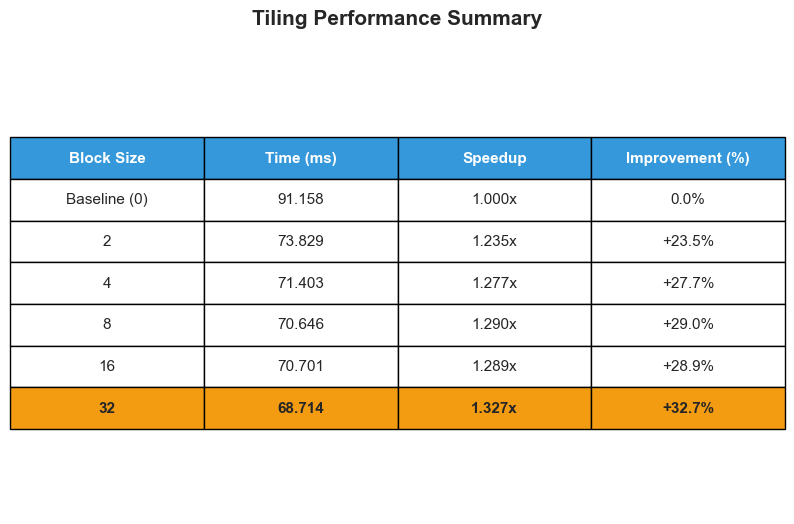

In [7]:
def create_summary_table(df):
    """Create summary table with all results"""
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('tight')
    ax.axis('off')
    
    # Prepare table data
    table_data = [['Block Size', 'Time (ms)', 'Speedup', 'Improvement (%)']]
    
    baseline_time = df[df['BlockSize'] == 0]['MeanTime_ms'].values[0]
    table_data.append(['Baseline (0)', f'{baseline_time:.3f}', '1.000x', '0.0%'])
    
    tiled = df[df['BlockSize'] != 0]
    for idx, row in tiled.iterrows():
        improvement = (1 - row['Speedup']) * -100  # Negative means improvement
        table_data.append([
            str(int(row['BlockSize'])),
            f"{row['MeanTime_ms']:.3f}",
            f"{row['Speedup']:.3f}x",
            f"{improvement:+.1f}%"
        ])
    
    # Create table
    table = ax.table(cellText=table_data, cellLoc='center', loc='center',
                     colWidths=[0.25, 0.25, 0.25, 0.25])
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1, 2.5)
    
    # Style header row
    for i in range(4):
        cell = table[(0, i)]
        cell.set_facecolor('#3498db')
        cell.set_text_props(weight='bold', color='white')
    
    # Highlight best speedup row
    best_idx = tiled['Speedup'].idxmax()
    best_row_in_table = list(tiled.index).index(best_idx) + 2  # +2 for header and baseline
    for i in range(4):
        cell = table[(best_row_in_table, i)]
        cell.set_facecolor('#f39c12')
        cell.set_text_props(weight='bold')
    
    plt.title('Tiling Performance Summary', fontsize=15, fontweight='bold', pad=20)
    plt.savefig('plot_tiling_table.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: plot_tiling_table.png")
    plt.show()

# Generate the table
if df is not None:
    create_summary_table(df)

# CELL 8: Summary and Next Steps
Final summary of all generated files

In [8]:
print("\n" + "="*60)
print("ALL VISUALIZATIONS COMPLETE!")
print("="*60)
print("\nGenerated files:")
print("  ✓ plot_tiling_performance.png - Line graph of execution time")
print("  ✓ plot_tiling_speedup.png     - Bar chart of speedups")
print("  ✓ plot_tiling_combined.png    - Side-by-side comparison")
print("  ✓ plot_tiling_table.png       - Summary table")
print("\nThese plots are ready to include in your Lab 5 report!")
print("="*60)

# Display key findings
if df is not None:
    tiled = df[df['BlockSize'] != 0]
    best_idx = tiled['Speedup'].idxmax()
    best_block = int(tiled.loc[best_idx, 'BlockSize'])
    best_speedup = tiled.loc[best_idx, 'Speedup']
    best_improvement = (1 - best_speedup) * -100
    
    print("\nKEY FINDINGS FOR MY REPORT:")
    print(f"  • Best block size: {best_block}")
    print(f"  • Maximum speedup: {best_speedup:.3f}x")
    print(f"  • Performance improvement: {best_improvement:+.1f}%")
    print("="*60 + "\n")


ALL VISUALIZATIONS COMPLETE!

Generated files:
  ✓ plot_tiling_performance.png - Line graph of execution time
  ✓ plot_tiling_speedup.png     - Bar chart of speedups
  ✓ plot_tiling_combined.png    - Side-by-side comparison
  ✓ plot_tiling_table.png       - Summary table

These plots are ready to include in your Lab 5 report!

KEY FINDINGS FOR MY REPORT:
  • Best block size: 32
  • Maximum speedup: 1.327x
  • Performance improvement: +32.7%

